<a href="https://colab.research.google.com/github/sripriyaagarwal16/Green-Life-Hub/blob/main/Resources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate synthetic data for 100 users
n_users = 100
locations = ['Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata']

data = {
    'electricity_usage': np.random.randint(100, 1000, n_users),
    'water_usage': np.random.randint(10, 100, n_users),
    'location': np.random.choice(locations, n_users),
    'non_renewable_energy_usage': np.random.randint(100, 1000, n_users),
}

# Calculate total bill and bill per unit
data['total_bill'] = data['electricity_usage'] + data['water_usage'] * 10  # Assuming water usage is in liters
data['bill_per_unit'] = data['total_bill'] / (data['electricity_usage'] + data['water_usage'])

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame as CSV
df.to_csv('energy_usage_data.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate synthetic data for 100 users
n_users = 100

data = {
    'budget': np.random.randint(5000, 20000, n_users),  # Assuming budget is in INR
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame as CSV
df.to_csv('budget_data.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate synthetic data for 100 users
n_users = 100
energy_sources = ['Solar', 'Wind', 'Hydro']

data = {
    'sustainable_energy_source_suggestion': np.random.choice(energy_sources, n_users),
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame as CSV
df.to_csv('energy_source_suggestion_data.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate synthetic data for 100 users
n_users = 100

data = {
    'sustainable_energy_source_suitability': np.random.rand(n_users),
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame as CSV
df.to_csv('energy_source_suitability_data.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate synthetic data for 100 users
n_users = 100

data = {
    'sustainable_energy_source_suitability': np.random.rand(n_users),
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame as CSV
df.to_csv('energy_source_suitability_data.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Load datasets
budget_data = pd.read_csv('/content/budget_data.csv')
suggestion_data = pd.read_csv('/content/energy_source_suggestion_data.csv')
suitability_data = pd.read_csv('/content/energy_source_suitability_data.csv')
usage_data = pd.read_csv('/content/energy_usage_data.csv')

# Merge datasets
data = pd.concat([usage_data, budget_data, suggestion_data, suitability_data], axis=1)

# Define features and target
X = data[['electricity_usage', 'water_usage', 'non_renewable_energy_usage', 'total_bill', 'budget']]
y = data['sustainable_energy_source_suitability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['electricity_usage', 'water_usage', 'non_renewable_energy_usage', 'total_bill', 'budget']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Models to evaluate
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'LinearRegression': LinearRegression(),
    'MLPRegressor': MLPRegressor()
}

# Hyperparameter tuning and evaluation
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    param_grid = {}
    if name == 'RandomForestRegressor':
        param_grid = {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__bootstrap': [True, False]
        }
    elif name == 'GradientBoostingRegressor':
        param_grid = {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [3, 5, 7],
            'model__learning_rate': [0.1, 0.01, 0.001]
        }
    elif name == 'SVR':
        param_grid = {
            'model__kernel': ['linear', 'poly', 'rbf'],
            'model__C': [0.1, 1, 10, 100],
            'model__gamma': ['scale', 'auto']
        }
    elif name == 'MLPRegressor':
        param_grid = {
            'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'model__activation': ['relu', 'tanh'],
            'model__alpha': [0.0001, 0.001, 0.01],
            'model__learning_rate': ['constant', 'invscaling', 'adaptive']
        }

    grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Evaluate model
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'best_model': best_model, 'mse': mse}

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Best Model: {result['best_model']}")


Training RandomForestRegressor...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Training GradientBoostingRegressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Training SVR...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training LinearRegression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training MLPRegressor...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Model: RandomForestRegressor
Mean Squared Error: 0.10524873651988102
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  

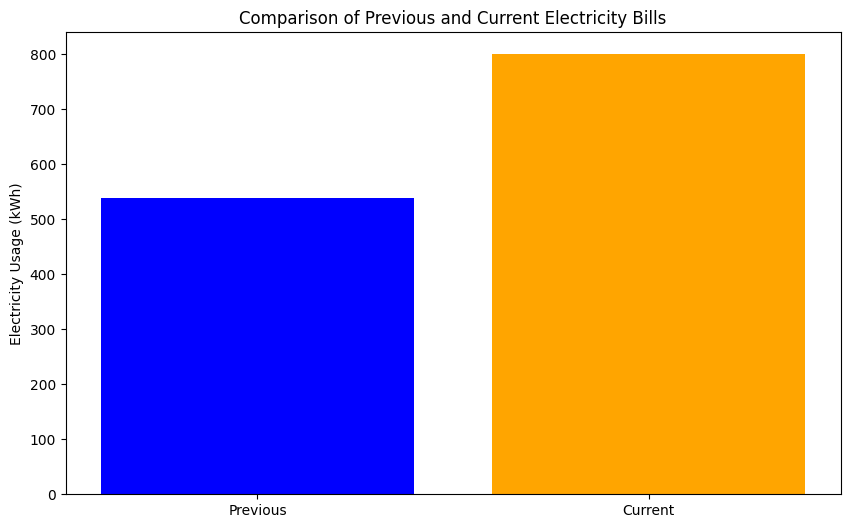

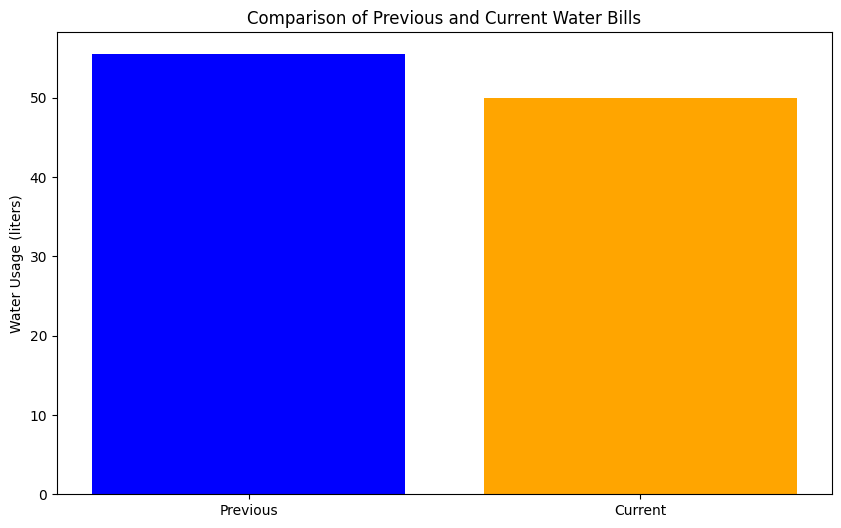

Based on your budget and location, we suggest starting to use Solar energy.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
energy_data_path = "/content/energy_usage_data.csv"
budget_data_path = "/content/budget_data.csv"
energy_source_suggestion_data_path = "/content/energy_source_suggestion_data.csv"

energy_data = pd.read_csv(energy_data_path)
budget_data = pd.read_csv(budget_data_path)
energy_source_suggestion_data = pd.read_csv(energy_source_suggestion_data_path)

# Assume the current usage and budget for visualization
current_electricity_usage = 800  # kWh
current_water_usage = 50  # liters
current_budget = 15000  # Rs.

# Comparison between previous and current electricity bills
plt.figure(figsize=(10, 6))
plt.bar(['Previous', 'Current'], [energy_data['electricity_usage'].mean(), current_electricity_usage], color=['blue', 'orange'])
plt.ylabel('Electricity Usage (kWh)')
plt.title('Comparison of Previous and Current Electricity Bills')
plt.show()

# Comparison between previous and current water bills
plt.figure(figsize=(10, 6))
plt.bar(['Previous', 'Current'], [energy_data['water_usage'].mean(), current_water_usage], color=['blue', 'orange'])
plt.ylabel('Water Usage (liters)')
plt.title('Comparison of Previous and Current Water Bills')
plt.show()

# Determine which renewable source to start using based on budget and location
# For simplicity, let's assume the budget and location suggest Solar energy
suggested_energy_source = 'Solar'

print(f"Based on your budget and location, we suggest starting to use {suggested_energy_source} energy.")



In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
energy_data_path = "/content/energy_usage_data.csv"
budget_data_path = "/content/budget_data.csv"
energy_source_suggestion_data_path = "/content/energy_source_suggestion_data.csv"

energy_data = pd.read_csv(energy_data_path)
budget_data = pd.read_csv(budget_data_path)
energy_source_suggestion_data = pd.read_csv(energy_source_suggestion_data_path)

# Function to calculate suggestions based on user input
def calculate_suggestions():
    try:
        # Get user input
        current_electricity_usage = float(entry_electricity.get())
        current_water_usage = float(entry_water.get())
        current_budget = float(entry_budget.get())
        location = entry_location.get()

        # Comparison between previous and current electricity bills
        plt.figure(figsize=(10, 6))
        plt.bar(['Previous', 'Current'], [energy_data['electricity_usage'].mean(), current_electricity_usage], color=['blue', 'orange'])
        plt.ylabel('Electricity Usage (kWh)')
        plt.title('Comparison of Previous and Current Electricity Bills')
        plt.show()

        # Comparison between previous and current water bills
        plt.figure(figsize=(10, 6))
        plt.bar(['Previous', 'Current'], [energy_data['water_usage'].mean(), current_water_usage], color=['blue', 'orange'])
        plt.ylabel('Water Usage (liters)')
        plt.title('Comparison of Previous and Current Water Bills')
        plt.show()

        # Determine which renewable source to start using based on budget and location
        # For simplicity, let's assume the budget and location suggest Solar energy
        suggested_energy_source = 'Solar'

        messagebox.showinfo("Suggestion", f"Based on your budget and location ({location}), we suggest starting to use {suggested_energy_source} energy.")

    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values for electricity usage, water usage, and budget.")

# Create the GUI
root = tk.Tk()
root.title("Energy Sustainability Calculator")

# Create labels and entry fields for user input
tk.Label(root, text="Electricity Usage (kWh):").pack()
entry_electricity = tk.Entry(root)
entry_electricity.pack()

tk.Label(root, text="Water Usage (liters):").pack()
entry_water = tk.Entry(root)
entry_water.pack()

tk.Label(root, text="Monthly Budget (Rs.):").pack()
entry_budget = tk.Entry(root)
entry_budget.pack()

tk.Label(root, text="Location:").pack()
entry_location = tk.Entry(root)
entry_location.pack()

# Create a button to calculate suggestions
tk.Button(root, text="Calculate Suggestions", command=calculate_suggestions).pack()

root.mainloop()


TclError: no display name and no $DISPLAY environment variable